## Project BTH- Machine learning wirh Streaming data Course

In papermil steamflow while making a paper roll is very important factor for the user/manager. In the dataset we have 11
independent variable that has influences on steamflow. 
We will apply different algorithms and find out which gives the least error(RMSE) and try implement that in an web app.


###  Apply ML algorithms

- 1 Linear Regression
- 2 XGBoost
- 3 Random Forest with Hyperparameter Tuning
- 4  Decision Tree Regressor with Hyperparameter Tuning



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sklearn
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [63]:
#importing dataset as dataframe to work with
df=pd.read_csv('papermil_water_flow.csv')

In [64]:
#Showing first 5 rows fof the data
df.head()

,pulp_to_mixing_tank23,flow_after_machine_chest21,level_condensate_bucket1_valve_position,steam_group3_pressure,steam_group4under_pressure,pressure_yankee_cylinder,steam_group5under_pressure,steam_pressure5_over,pressure_condensate_bucket5,production_paper_machine2,dry_production_vira,steamflow
0,185.99,3075.3,48.750,231.28,246.49,246.86,246.41,246.53,95.750,11.782,173.23,16.509
1,185.37,3056.2,40.707,228.65,244.26,243.49,243.84,244.05,95.750,11.645,171.45,16.343
2,185.55,3046.1,40.638,208.19,223.78,222.93,223.66,223.29,75.750,11.751,170.77,16.433
3,187.04,3083.1,40.638,209.97,225.40,224.40,225.11,224.71,79.125,11.728,171.16,16.433
4,205.80,3401.1,30.112,181.99,195.42,196.72,195.67,195.74,49.875,11.684,193.45,16.455


In [65]:
df.dtypes

pulp_to_mixing_tank23                      float64
flow_after_machine_chest21                 float64
level_condensate_bucket1_valve_position    float64
steam_group3_pressure                      float64
steam_group4under_pressure                 float64
pressure_yankee_cylinder                   float64
steam_group5under_pressure                 float64
steam_pressure5_over                       float64
pressure_condensate_bucket5                float64
production_paper_machine2                  float64
dry_production_vira                        float64
steamflow                                  float64
dtype: object

<AxesSubplot:>

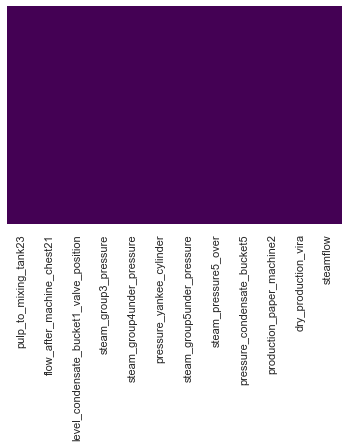

In [66]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
#Statistical description of dataframe 
df.describe()

,pulp_to_mixing_tank23,flow_after_machine_chest21,level_condensate_bucket1_valve_position,steam_group3_pressure,steam_group4under_pressure,pressure_yankee_cylinder,steam_group5under_pressure,steam_pressure5_over,pressure_condensate_bucket5,production_paper_machine2,dry_production_vira,steamflow
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,174.558980,2887.792237,37.972812,215.801767,237.021452,236.999768,236.999837,236.985013,75.160020,11.118898,159.916113,18.338152
std,21.726282,365.226054,15.942546,22.078480,21.369723,21.414796,21.334429,21.364826,17.598555,0.878348,20.332352,1.329906
min,130.830000,2147.600000,12.107000,127.410000,142.020000,142.730000,142.840000,143.160000,2.500000,0.000000,115.840000,12.920000
25%,159.775000,2639.000000,25.490500,202.780000,224.915000,224.810000,224.915000,224.890000,65.500000,10.451000,147.010000,17.584000
50%,175.430000,2902.100000,38.315000,219.590000,241.450000,241.330000,241.410000,241.390000,78.510000,11.119000,160.930000,18.480000
75%,191.270000,3168.750000,44.192500,231.640000,252.070000,252.145000,252.075000,252.005000,90.625000,11.855000,175.450000,19.126500
max,222.510000,3699.900000,100.000000,277.200000,291.930000,294.310000,286.470000,289.870000,99.688000,13.174000,204.570000,23.649000


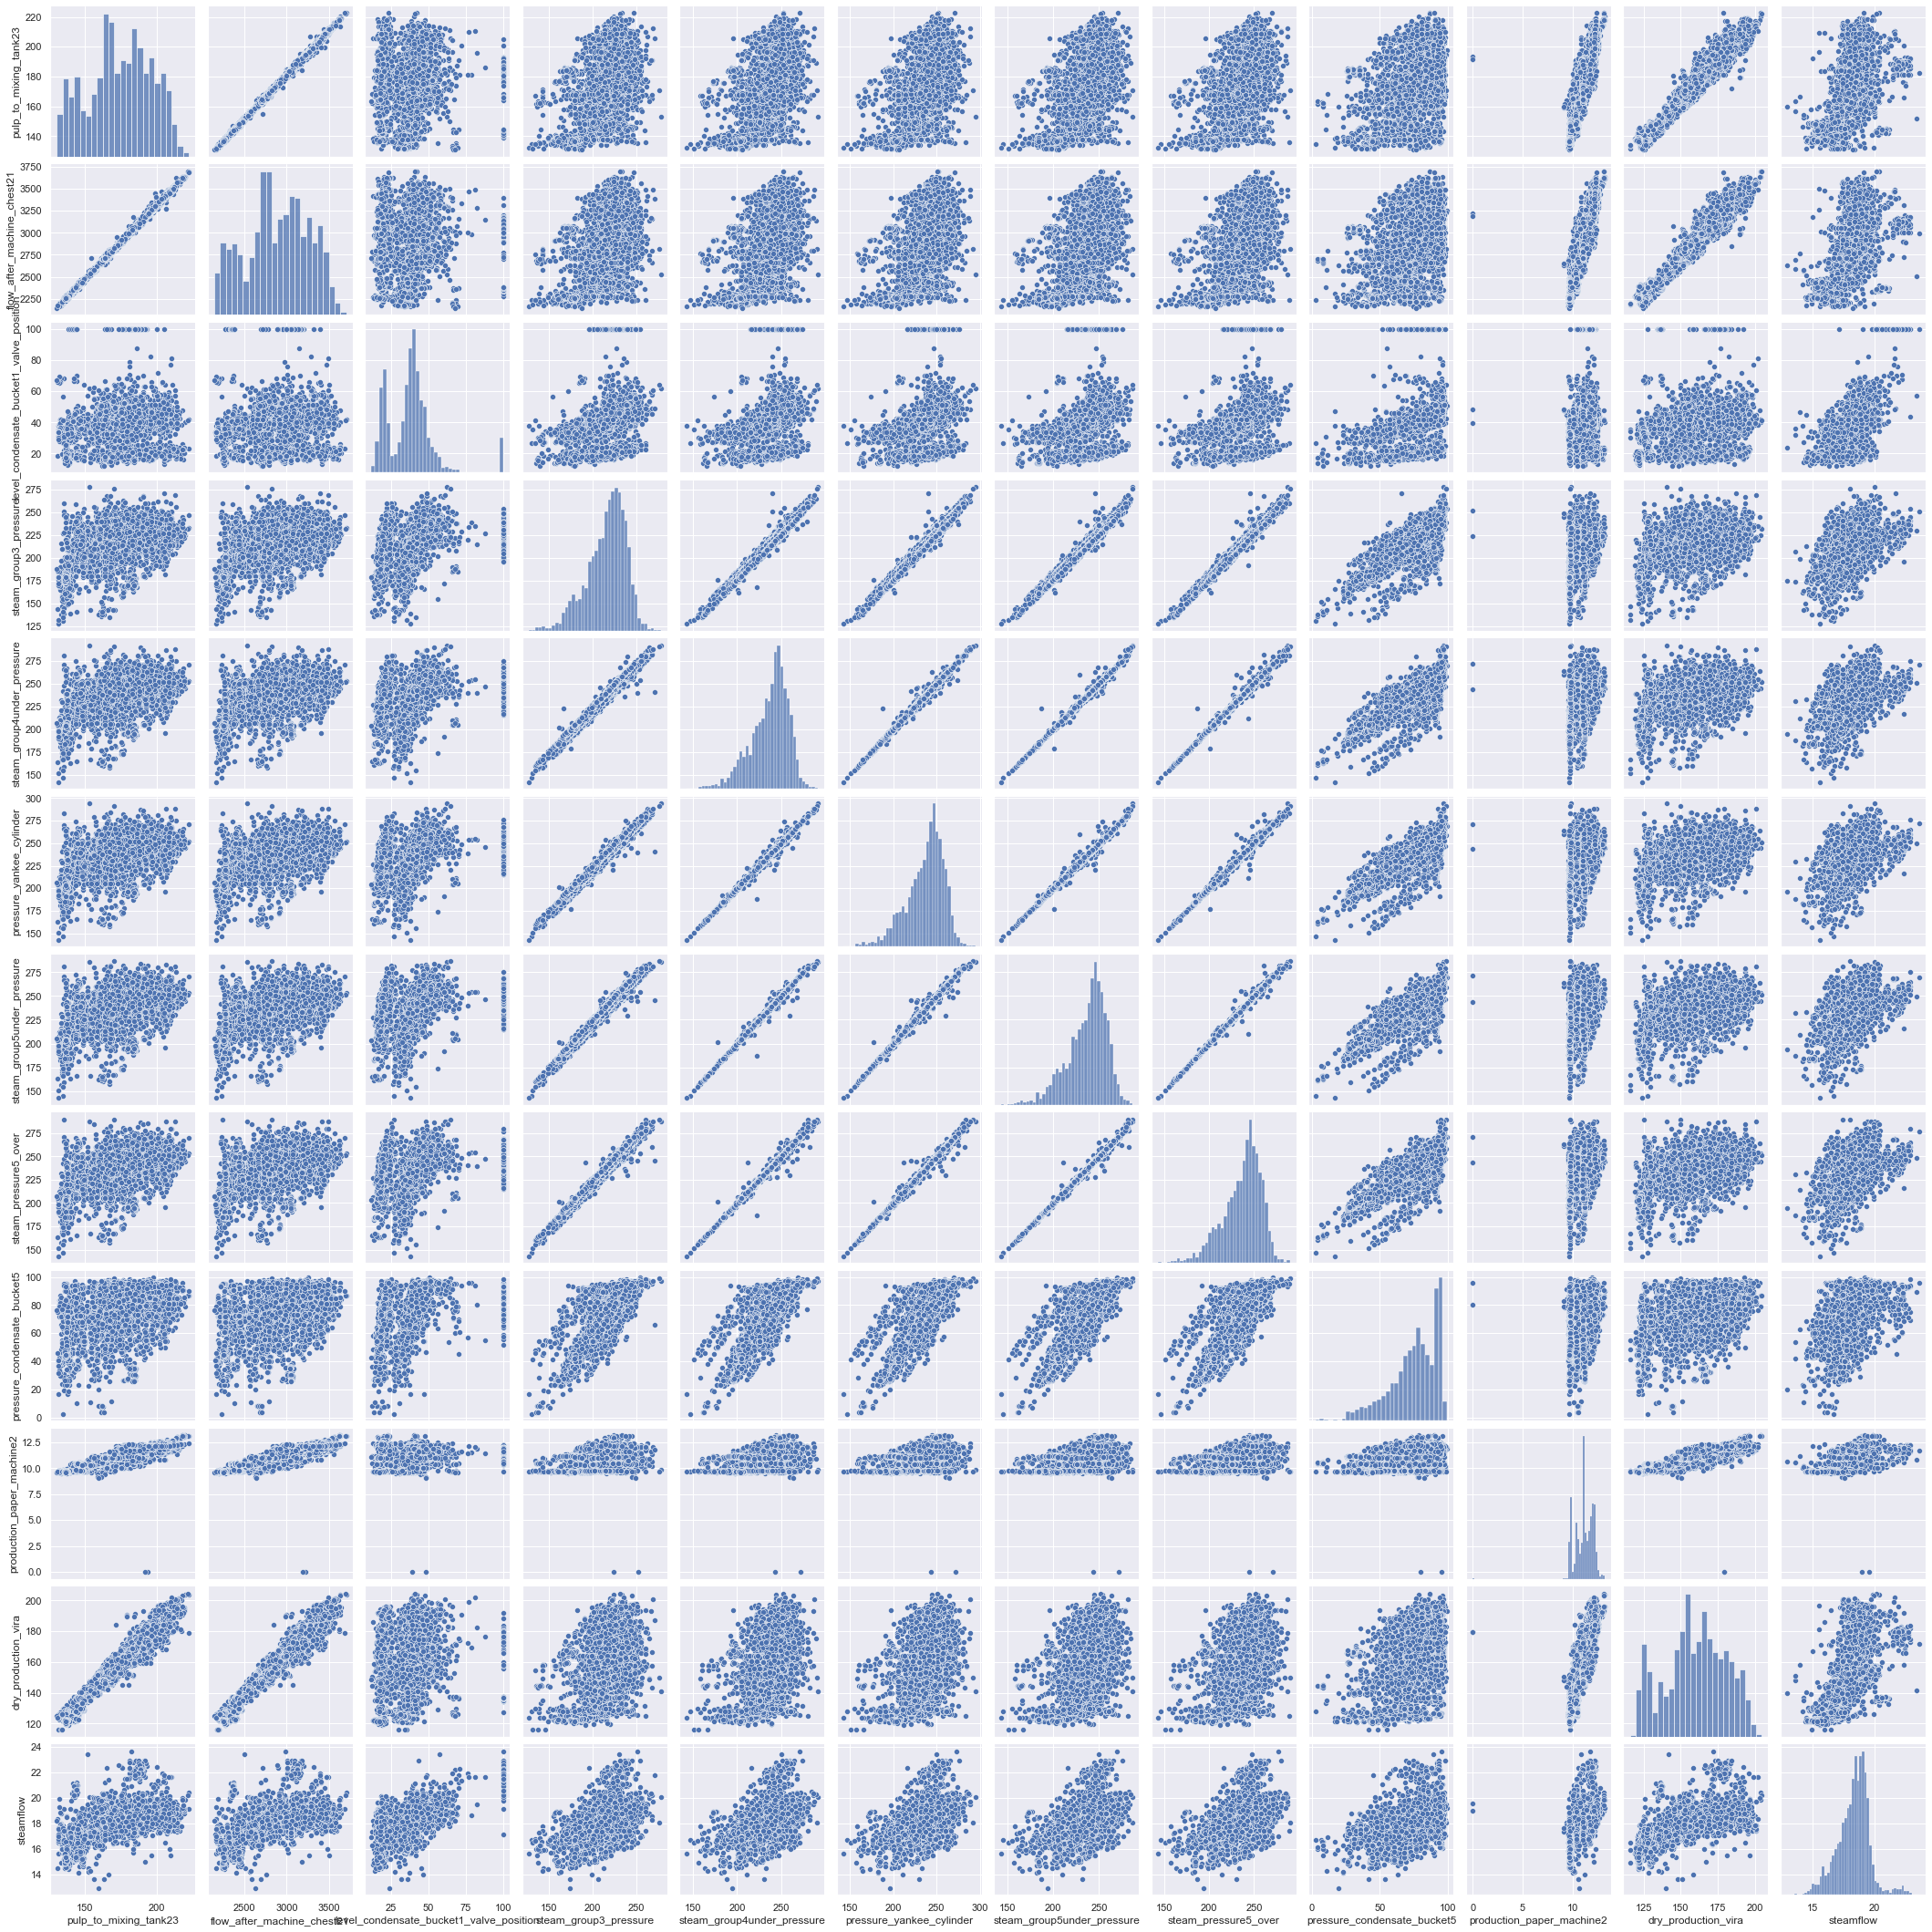

In [68]:
#pairplot is made when you only want to visualize the relationship between two variables, 
#where the variables can be continous, categorical (product type or part of day for example) 
#or booleans (yes/no - 1/0).
sns.pairplot(df)

In [69]:
#Pair wise correlation of the dataframe
df.corr(method='pearson')

,pulp_to_mixing_tank23,flow_after_machine_chest21,level_condensate_bucket1_valve_position,steam_group3_pressure,steam_group4under_pressure,pressure_yankee_cylinder,steam_group5under_pressure,steam_pressure5_over,pressure_condensate_bucket5,production_paper_machine2,dry_production_vira,steamflow
pulp_to_mixing_tank23,1.000000,0.999054,0.089515,0.417484,0.467418,0.467243,0.467735,0.466962,0.387294,0.851722,0.967239,0.508953
flow_after_machine_chest21,0.999054,1.000000,0.084339,0.414138,0.466037,0.465963,0.466522,0.465739,0.385457,0.852954,0.965442,0.506810
level_condensate_bucket1_valve_position,0.089515,0.084339,1.000000,0.350647,0.329417,0.329302,0.330702,0.328481,0.446546,0.053781,0.199207,0.635961
steam_group3_pressure,0.417484,0.414138,0.350647,1.000000,0.981893,0.981652,0.981891,0.981237,0.753360,0.354241,0.427573,0.540949
steam_group4under_pressure,0.467418,0.466037,0.329417,0.981893,1.000000,0.997312,0.997771,0.996760,0.769580,0.409213,0.470928,0.547853
pressure_yankee_cylinder,0.467243,0.465963,0.329302,0.981652,0.997312,1.000000,0.997311,0.996719,0.768714,0.410073,0.470547,0.548724
steam_group5under_pressure,0.467735,0.466522,0.330702,0.981891,0.997771,0.997311,1.000000,0.998210,0.769734,0.409940,0.471265,0.548878
steam_pressure5_over,0.466962,0.465739,0.328481,0.981237,0.996760,0.996719,0.998210,1.000000,0.768915,0.409751,0.470113,0.547301
pressure_condensate_bucket5,0.387294,0.385457,0.446546,0.753360,0.769580,0.768714,0.769734,0.768915,1.000000,0.358508,0.405174,0.501262
production_paper_machine2,0.851722,0.852954,0.053781,0.354241,0.409213,0.410073,0.409940,0.409751,0.358508,1.000000,0.832899,0.524228


In [70]:
newdf= df[['pulp_to_mixing_tank23', 
       'flow_after_machine_chest21', 
       'level_condensate_bucket1_valve_position', 
        'steam_group3_pressure',
       'steam_group4under_pressure',        
       'pressure_yankee_cylinder',
       'steam_group5under_pressure',
       'steam_pressure5_over',
       'pressure_condensate_bucket5',
       'production_paper_machine2',
       'dry_production_vira', 
       'steamflow'
      ]]
newdf.corr(method='pearson')

,pulp_to_mixing_tank23,flow_after_machine_chest21,level_condensate_bucket1_valve_position,steam_group3_pressure,steam_group4under_pressure,pressure_yankee_cylinder,steam_group5under_pressure,steam_pressure5_over,pressure_condensate_bucket5,production_paper_machine2,dry_production_vira,steamflow
pulp_to_mixing_tank23,1.000000,0.999054,0.089515,0.417484,0.467418,0.467243,0.467735,0.466962,0.387294,0.851722,0.967239,0.508953
flow_after_machine_chest21,0.999054,1.000000,0.084339,0.414138,0.466037,0.465963,0.466522,0.465739,0.385457,0.852954,0.965442,0.506810
level_condensate_bucket1_valve_position,0.089515,0.084339,1.000000,0.350647,0.329417,0.329302,0.330702,0.328481,0.446546,0.053781,0.199207,0.635961
steam_group3_pressure,0.417484,0.414138,0.350647,1.000000,0.981893,0.981652,0.981891,0.981237,0.753360,0.354241,0.427573,0.540949
steam_group4under_pressure,0.467418,0.466037,0.329417,0.981893,1.000000,0.997312,0.997771,0.996760,0.769580,0.409213,0.470928,0.547853
pressure_yankee_cylinder,0.467243,0.465963,0.329302,0.981652,0.997312,1.000000,0.997311,0.996719,0.768714,0.410073,0.470547,0.548724
steam_group5under_pressure,0.467735,0.466522,0.330702,0.981891,0.997771,0.997311,1.000000,0.998210,0.769734,0.409940,0.471265,0.548878
steam_pressure5_over,0.466962,0.465739,0.328481,0.981237,0.996760,0.996719,0.998210,1.000000,0.768915,0.409751,0.470113,0.547301
pressure_condensate_bucket5,0.387294,0.385457,0.446546,0.753360,0.769580,0.768714,0.769734,0.768915,1.000000,0.358508,0.405174,0.501262
production_paper_machine2,0.851722,0.852954,0.053781,0.354241,0.409213,0.410073,0.409940,0.409751,0.358508,1.000000,0.832899,0.524228


In [71]:
newdf.describe()

,pulp_to_mixing_tank23,flow_after_machine_chest21,level_condensate_bucket1_valve_position,steam_group3_pressure,steam_group4under_pressure,pressure_yankee_cylinder,steam_group5under_pressure,steam_pressure5_over,pressure_condensate_bucket5,production_paper_machine2,dry_production_vira,steamflow
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,174.558980,2887.792237,37.972812,215.801767,237.021452,236.999768,236.999837,236.985013,75.160020,11.118898,159.916113,18.338152
std,21.726282,365.226054,15.942546,22.078480,21.369723,21.414796,21.334429,21.364826,17.598555,0.878348,20.332352,1.329906
min,130.830000,2147.600000,12.107000,127.410000,142.020000,142.730000,142.840000,143.160000,2.500000,0.000000,115.840000,12.920000
25%,159.775000,2639.000000,25.490500,202.780000,224.915000,224.810000,224.915000,224.890000,65.500000,10.451000,147.010000,17.584000
50%,175.430000,2902.100000,38.315000,219.590000,241.450000,241.330000,241.410000,241.390000,78.510000,11.119000,160.930000,18.480000
75%,191.270000,3168.750000,44.192500,231.640000,252.070000,252.145000,252.075000,252.005000,90.625000,11.855000,175.450000,19.126500
max,222.510000,3699.900000,100.000000,277.200000,291.930000,294.310000,286.470000,289.870000,99.688000,13.174000,204.570000,23.649000


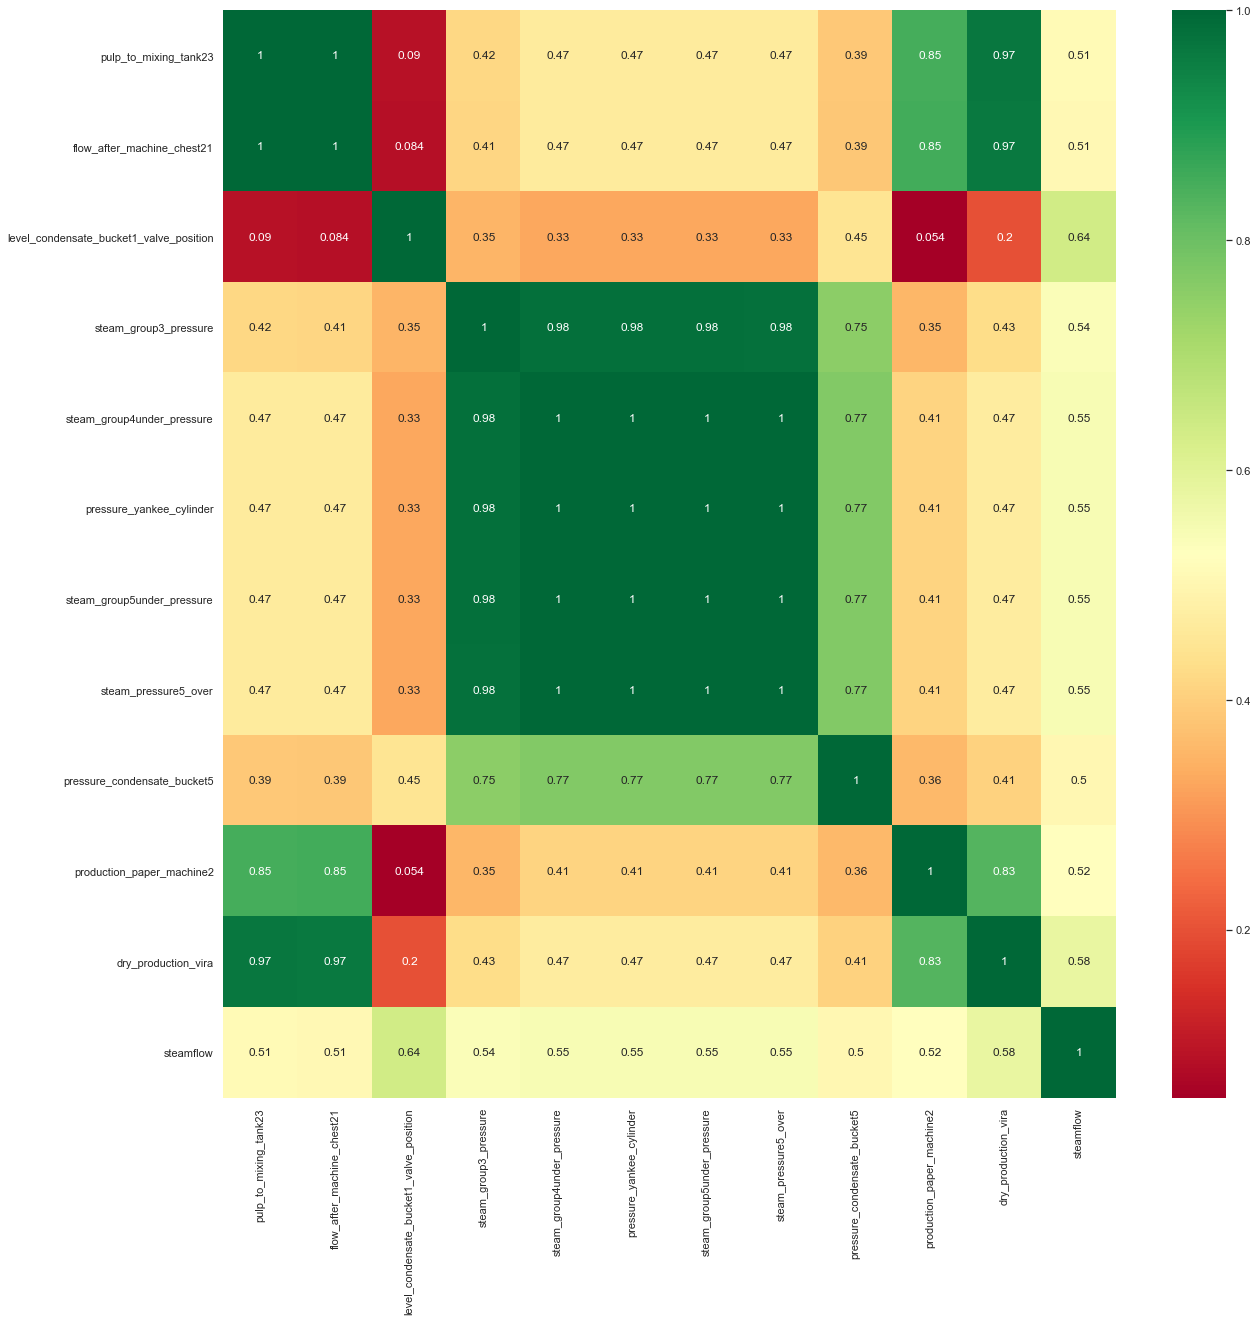

In [72]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = newdf.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(newdf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [74]:
corrmat.index

Index(['pulp_to_mixing_tank23', 'flow_after_machine_chest21',
       'level_condensate_bucket1_valve_position', 'steam_group3_pressure',
       'steam_group4under_pressure', 'pressure_yankee_cylinder',
       'steam_group5under_pressure', 'steam_pressure5_over',
       'pressure_condensate_bucket5', 'production_paper_machine2',
       'dry_production_vira', 'steamflow'],
      dtype='object')

In [75]:
#Correlation with output variable
cor_target = abs(corrmat["steamflow"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

pulp_to_mixing_tank23                      0.508953
flow_after_machine_chest21                 0.506810
level_condensate_bucket1_valve_position    0.635961
steam_group3_pressure                      0.540949
steam_group4under_pressure                 0.547853
pressure_yankee_cylinder                   0.548724
steam_group5under_pressure                 0.548878
steam_pressure5_over                       0.547301
pressure_condensate_bucket5                0.501262
production_paper_machine2                  0.524228
dry_production_vira                        0.581135
steamflow                                  1.000000
Name: steamflow, dtype: float64

In [76]:
#Seperating Independent variable and dependent variable
X= df[['pulp_to_mixing_tank23', 
       'flow_after_machine_chest21', 
       'level_condensate_bucket1_valve_position', 
       'steam_group3_pressure',
       'steam_group4under_pressure',        
       'pressure_yankee_cylinder',
       'steam_group5under_pressure',
       'steam_pressure5_over',
       'pressure_condensate_bucket5',
       'production_paper_machine2',
       'dry_production_vira'
      ]]
y= df[['steamflow']]


## Train and test split 

In [77]:
from sklearn.model_selection import train_test_split

from sklearn import metrics 
#training set 80%
#testing set 20%

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20)


## 1. Linear Regression
From Wilipedia: 
In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression
https://en.wikipedia.org/wiki/Linear_regression#cite_note-Freedman09-1

In [78]:
##initiate the model
model= LinearRegression()
##Fiting the model
model_fit= model.fit(X_train, y_train)

In [79]:
##Testing the model
test_predict = model_fit.predict(X_test)

In [80]:
##Root Mean Square error(RMSE)
rmse_lreg= np.sqrt(metrics.mean_squared_error(y_test, test_predict))
print('Root Mean squared error RMSE: ' +str(rmse_lreg))

Root Mean squared error RMSE: 0.7515299041124395


In [81]:
from sklearn.metrics import r2_score
r2_lreg = r2_score(y_test, test_predict)
print("R2 SCORE ON TEST DATA: {}".format(r2_lreg))

R2 SCORE ON TEST DATA: 0.6823721763486857


In [82]:
# Saving the XGB model
import pickle
pickle.dump(model, open('papermil_lreg.pkl', 'wb'))

### 2. XGBoost

XGBoost stands for eXtreme Gradient Boosting.

"The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost."- Tianqi Chen

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Source: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/


In [83]:
import xgboost
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 1000),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = xgboost.XGBRegressor(nthreads=-1)

In [84]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [85]:
random_search=RandomizedSearchCV(xgbreg,params,n_iter=5,n_jobs=-1,cv=10,verbose=3)

In [86]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [87]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.values.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.2s finished


[15:09:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Time taken: 0 hours 1 minutes and 4.09 seconds.


In [88]:
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.9380477547610616, gamma=5.98959272418207,
             learning_rate=0.3544160872235958, max_depth=19,
             min_child_weight=52.06856085381634, n_estimators=627, nthreads=-1,
             reg_alpha=3.0572610334349606, subsample=0.9866177775694309)

In [89]:
modelXGB=xgboost.XGBRegressor(colsample_bytree=0.9380477547610616, gamma=5.98959272418207,
             learning_rate=0.3544160872235958, max_depth=19,
             min_child_weight=52.06856085381634, n_estimators=627, nthreads=-1,
             reg_alpha=3.0572610334349606, subsample=0.9866177775694309)

In [91]:
modelXGB.fit(X_train,y_train)
test_predict_XGB = modelXGB.predict(X_test)
# Predict (after fitting GridSearchCV is an estimator with best parameters)
y_pred = modelXGB.predict(X_test)
 
# Score
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(r2_xgb))

[15:13:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 SCORE ON TEST DATA: 0.7481763129897592


In [92]:
from sklearn.metrics import mean_squared_error
rmse_xgb = np.sqrt(mean_squared_error(y_test, test_predict_XGB))
print("RMSE: %f" % (rmse_xgb))

RMSE: 0.669168


In [27]:
# Saving the XGB model
import pickle
pickle.dump(modelXGB, open('papermil_xgb.pkl', 'wb'))

### 3. RandomForest with hyperparameter tuning
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
From: https://en.wikipedia.org/wiki/Random_forest


In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.
From: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV # Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor() # Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, n_jobs = -1, verbose = 2)
model_fit_RF= random_search.fit(X_train, y_train)
print(model_fit_RF.best_params_)
##Testing the model
test_predict_RF = model_fit_RF.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 100, 'bootstrap': True}


In [95]:
from sklearn import metrics

print('RF Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predict_RF))
print('RF Mean Squared Error:', metrics.mean_squared_error(y_test, test_predict_RF))
print('RF R2:', metrics.r2_score(y_test, test_predict_RF))
print('RF Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predict_RF)))


RF Mean Absolute Error: 0.40787877450602067
RF Mean Squared Error: 0.38002862151681377
RF R2: 0.7862814038972165
RF Root Mean Squared Error: 0.616464614975437


In [96]:
# Saving the model
import pickle
pickle.dump(model_fit_RF, open('papermil_rf.pkl', 'wb'))

## 4.  Decision Tree Regressor with Hyperparameter Tuning

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. 
From: https://en.wikipedia.org/wiki/Decision_tree

In [98]:
#DT with hypeparmeter tuning
from sklearn.tree import DecisionTreeRegressor
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}


In [99]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor()
random_search_dt=GridSearchCV(dtree,param_grid=params,scoring='r2',n_jobs=-1,cv=10,verbose=3)
model_fit_DT=random_search_dt.fit(X_train, y_train)
print(model_fit_DT.best_score_)

predictions_dt=random_search_dt.predict(X_test)


Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 17392 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 24048 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 31728 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 40432 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 50160 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 60912 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 72688 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 85488 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 99312 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 10240

0.539640848282013


In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dt))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dt))
print('R2:', metrics.r2_score(y_test, predictions_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dt)))

MAE: 0.6810622786808678
MSE: 0.8687274105313123
R2: 0.5114494223258282
RMSE: 0.9320554761017781


In [102]:
# Saving the model
import pickle
pickle.dump(model_fit_DT, open('papermil_dt.pkl', 'wb'))